In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
low_memory=False

df = pd.read_csv("D:\Downloads\Video_games_esrb_rating.csv",sep=",", low_memory=False)  #завантажит дані
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [7]:
print(df.shape) #розмір датасета
df.info()

(1895, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood   

In [8]:
df=df.drop([ 'title'], axis = 1)
#викидаємо назву ігор

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   console                   1895 non-null   int64 
 1   alcohol_reference         1895 non-null   int64 
 2   animated_blood            1895 non-null   int64 
 3   blood                     1895 non-null   int64 
 4   blood_and_gore            1895 non-null   int64 
 5   cartoon_violence          1895 non-null   int64 
 6   crude_humor               1895 non-null   int64 
 7   drug_reference            1895 non-null   int64 
 8   fantasy_violence          1895 non-null   int64 
 9   intense_violence          1895 non-null   int64 
 10  language                  1895 non-null   int64 
 11  lyrics                    1895 non-null   int64 
 12  mature_humor              1895 non-null   int64 
 13  mild_blood                1895 non-null   int64 
 14  mild_cartoon_violence   

In [10]:
df.shape #розмір датасету, 1800+ записів, 33 колонки

(1895, 33)

In [11]:
df['esrb_rating'].value_counts() #рейтинг, наші класи

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [12]:
s = df['esrb_rating']
s, unique = pd.factorize(s)  #кожний клас отримаэ инт мітку
df['esrb_rating'] = s  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   console                   1895 non-null   int64
 1   alcohol_reference         1895 non-null   int64
 2   animated_blood            1895 non-null   int64
 3   blood                     1895 non-null   int64
 4   blood_and_gore            1895 non-null   int64
 5   cartoon_violence          1895 non-null   int64
 6   crude_humor               1895 non-null   int64
 7   drug_reference            1895 non-null   int64
 8   fantasy_violence          1895 non-null   int64
 9   intense_violence          1895 non-null   int64
 10  language                  1895 non-null   int64
 11  lyrics                    1895 non-null   int64
 12  mature_humor              1895 non-null   int64
 13  mild_blood                1895 non-null   int64
 14  mild_cartoon_violence     1895 non-null 

In [13]:
df['esrb_rating'].value_counts()
#тепер класи інт

3    689
0    416
1    403
2    387
Name: esrb_rating, dtype: int64

In [14]:
corr = df.corr()  #кореляція між фічами, чим більше по модулю, тим більша залежність

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)

corr

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
console,NaN,-0.010502,0.031460,-0.018638,0.074368,0.117672,0.060719,-0.002193,-0.149703,0.014717,...,-0.034284,-0.035514,0.065992,0.063812,0.043566,-0.072237,-0.027630,0.031628,0.010672,-0.026527
alcohol_reference,-0.010502,NaN,0.001153,-0.078723,-0.036286,0.054970,-0.001745,0.009118,-0.075557,0.148086,...,-0.043297,-0.025596,-0.003547,-0.076622,0.007684,-0.001347,0.164599,-0.029137,-0.040217,-0.021947
animated_blood,0.031460,0.001153,NaN,-0.054686,-0.038232,-0.014202,-0.000764,0.154219,-0.027989,0.094402,...,-0.018967,-0.024862,-0.026972,-0.020440,-0.019415,-0.036753,0.072105,0.029670,0.017046,0.029284
blood,-0.018638,-0.078723,-0.054686,NaN,-0.206437,-0.067592,-0.080343,-0.041479,-0.173801,0.089358,...,0.084194,0.071050,0.105880,0.291957,-0.037207,0.090421,-0.038687,-0.018533,0.007284,0.420497
blood_and_gore,0.074368,-0.036286,-0.038232,-0.206437,NaN,-0.042122,-0.027978,0.118566,-0.171432,0.289246,...,0.138011,0.124611,0.012603,0.220318,0.336910,-0.025282,-0.009979,0.053693,0.063320,0.164055
cartoon_violence,0.117672,0.054970,-0.014202,-0.067592,-0.042122,NaN,-0.017009,0.014797,-0.075072,-0.051667,...,-0.026596,0.030661,-0.022569,-0.051667,-0.027225,0.007645,0.043213,0.012657,-0.036855,0.024950
crude_humor,0.060719,-0.001745,-0.000764,-0.080343,-0.027978,-0.017009,NaN,-0.045542,-0.077018,0.085252,...,-0.032395,-0.029236,0.317392,-0.066149,0.016318,-0.029767,-0.011759,-0.030407,-0.005491,0.134518
drug_reference,-0.002193,0.009118,0.154219,-0.041479,0.118566,0.014797,-0.045542,NaN,-0.101056,0.019599,...,0.027456,0.089050,0.064191,0.162238,0.071671,0.037812,-0.024093,-0.024093,-0.002522,0.083606
fantasy_violence,-0.149703,-0.075557,-0.027989,-0.173801,-0.171432,-0.075072,-0.077018,-0.101056,NaN,-0.167181,...,-0.044318,-0.038499,-0.040787,-0.072573,-0.054735,0.082195,0.003901,0.003901,-0.086881,-0.012567
intense_violence,0.014717,0.148086,0.094402,0.089358,0.289246,-0.051667,0.085252,0.019599,-0.167181,NaN,...,0.002844,0.021872,0.006457,0.098834,0.386323,-0.006898,0.058322,0.005943,-0.008710,0.140332


<AxesSubplot:>

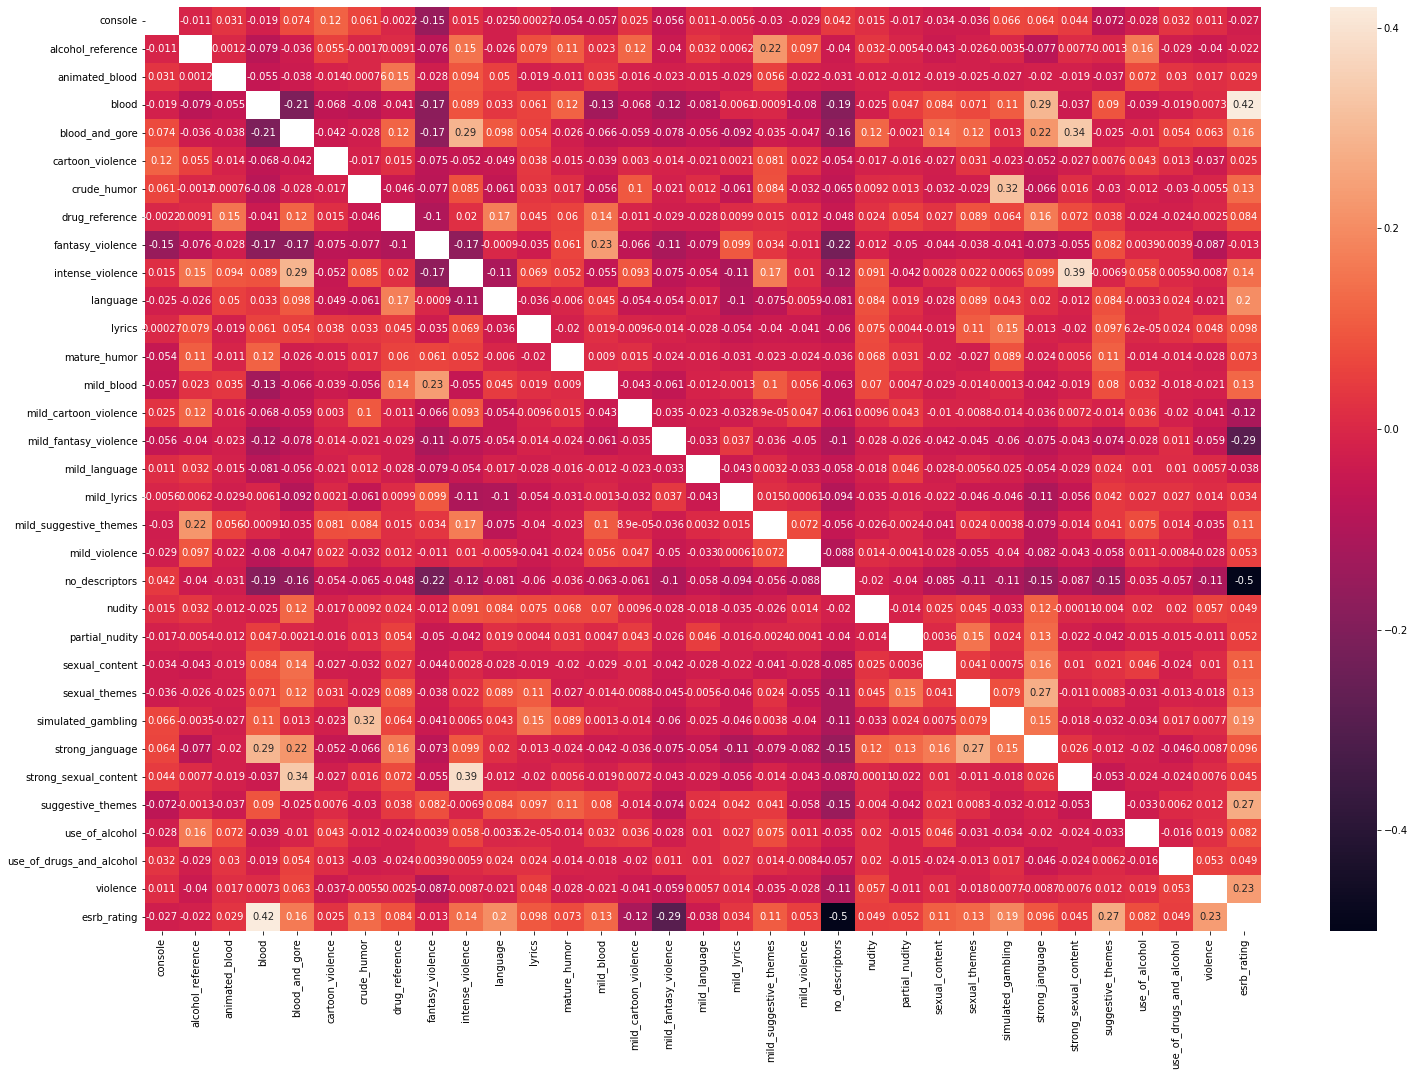

In [15]:
plt.figure(figsize = (25,17)) #цільова внизу - візуал. кореляції
sns.heatmap(corr, annot=True)

In [16]:
df.corr().abs()['esrb_rating'].sort_values(ascending = False) #сортуємо фічі, що найбіль кор. з рейтингом

esrb_rating                 1.000000
no_descriptors              0.500615
blood                       0.420497
mild_fantasy_violence       0.290387
suggestive_themes           0.266065
violence                    0.233827
language                    0.201757
simulated_gambling          0.186686
blood_and_gore              0.164055
intense_violence            0.140332
crude_humor                 0.134518
mild_blood                  0.127510
sexual_themes               0.126587
mild_cartoon_violence       0.115527
sexual_content              0.113222
mild_suggestive_themes      0.105536
lyrics                      0.098412
strong_janguage             0.095667
drug_reference              0.083606
use_of_alcohol              0.081748
mature_humor                0.072940
mild_violence               0.052822
partial_nudity              0.052145
use_of_drugs_and_alcohol    0.049256
nudity                      0.048806
strong_sexual_content       0.045045
mild_language               0.037746
m

In [17]:
df=df.drop(['fantasy_violence','alcohol_reference','cartoon_violence','console','animated_blood', 'mild_lyrics', 'mild_language', 'strong_sexual_content', 'nudity', 'use_of_drugs_and_alcohol', 'partial_nudity', 'mild_violence', 'mature_humor', 'use_of_alcohol', 'drug_reference', 'strong_janguage', 'lyrics'], axis = 1)

In [18]:
corr = df.corr()

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)

corr

,blood,blood_and_gore,crude_humor,intense_violence,language,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_suggestive_themes,no_descriptors,sexual_content,sexual_themes,simulated_gambling,suggestive_themes,violence,esrb_rating
blood,NaN,-0.206437,-0.080343,0.089358,0.033477,-0.128925,-0.068227,-0.116163,-0.000913,-0.185570,0.084194,0.071050,0.105880,0.090421,0.007284,0.420497
blood_and_gore,-0.206437,NaN,-0.027978,0.289246,0.097976,-0.066487,-0.059250,-0.077890,-0.035481,-0.159186,0.138011,0.124611,0.012603,-0.025282,0.063320,0.164055
crude_humor,-0.080343,-0.027978,NaN,0.085252,-0.061018,-0.056458,0.100194,-0.021187,0.084074,-0.065087,-0.032395,-0.029236,0.317392,-0.029767,-0.005491,0.134518
intense_violence,0.089358,0.289246,0.085252,NaN,-0.111730,-0.055239,0.093188,-0.074587,0.167331,-0.122131,0.002844,0.021872,0.006457,-0.006898,-0.008710,0.140332
language,0.033477,0.097976,-0.061018,-0.111730,NaN,0.044850,-0.054319,-0.054385,-0.075009,-0.080675,-0.028300,0.089083,0.042541,0.083706,-0.021470,0.201757
mild_blood,-0.128925,-0.066487,-0.056458,-0.055239,0.044850,NaN,-0.042676,-0.061456,0.102214,-0.063086,-0.028790,-0.014179,0.001273,0.080199,-0.020590,0.127510
mild_cartoon_violence,-0.068227,-0.059250,0.100194,0.093188,-0.054319,-0.042676,NaN,-0.035029,0.000089,-0.061336,-0.010351,-0.008758,-0.014080,-0.013934,-0.040732,-0.115527
mild_fantasy_violence,-0.116163,-0.077890,-0.021187,-0.074587,-0.054385,-0.061456,-0.035029,NaN,-0.036379,-0.101617,-0.042329,-0.044885,-0.060195,-0.074364,-0.058657,-0.290387
mild_suggestive_themes,-0.000913,-0.035481,0.084074,0.167331,-0.075009,0.102214,0.000089,-0.036379,NaN,-0.056481,-0.040589,0.023877,0.003798,0.040699,-0.035273,0.105536
no_descriptors,-0.185570,-0.159186,-0.065087,-0.122131,-0.080675,-0.063086,-0.061336,-0.101617,-0.056481,NaN,-0.085270,-0.111773,-0.110023,-0.147791,-0.106668,-0.500615


<AxesSubplot:>

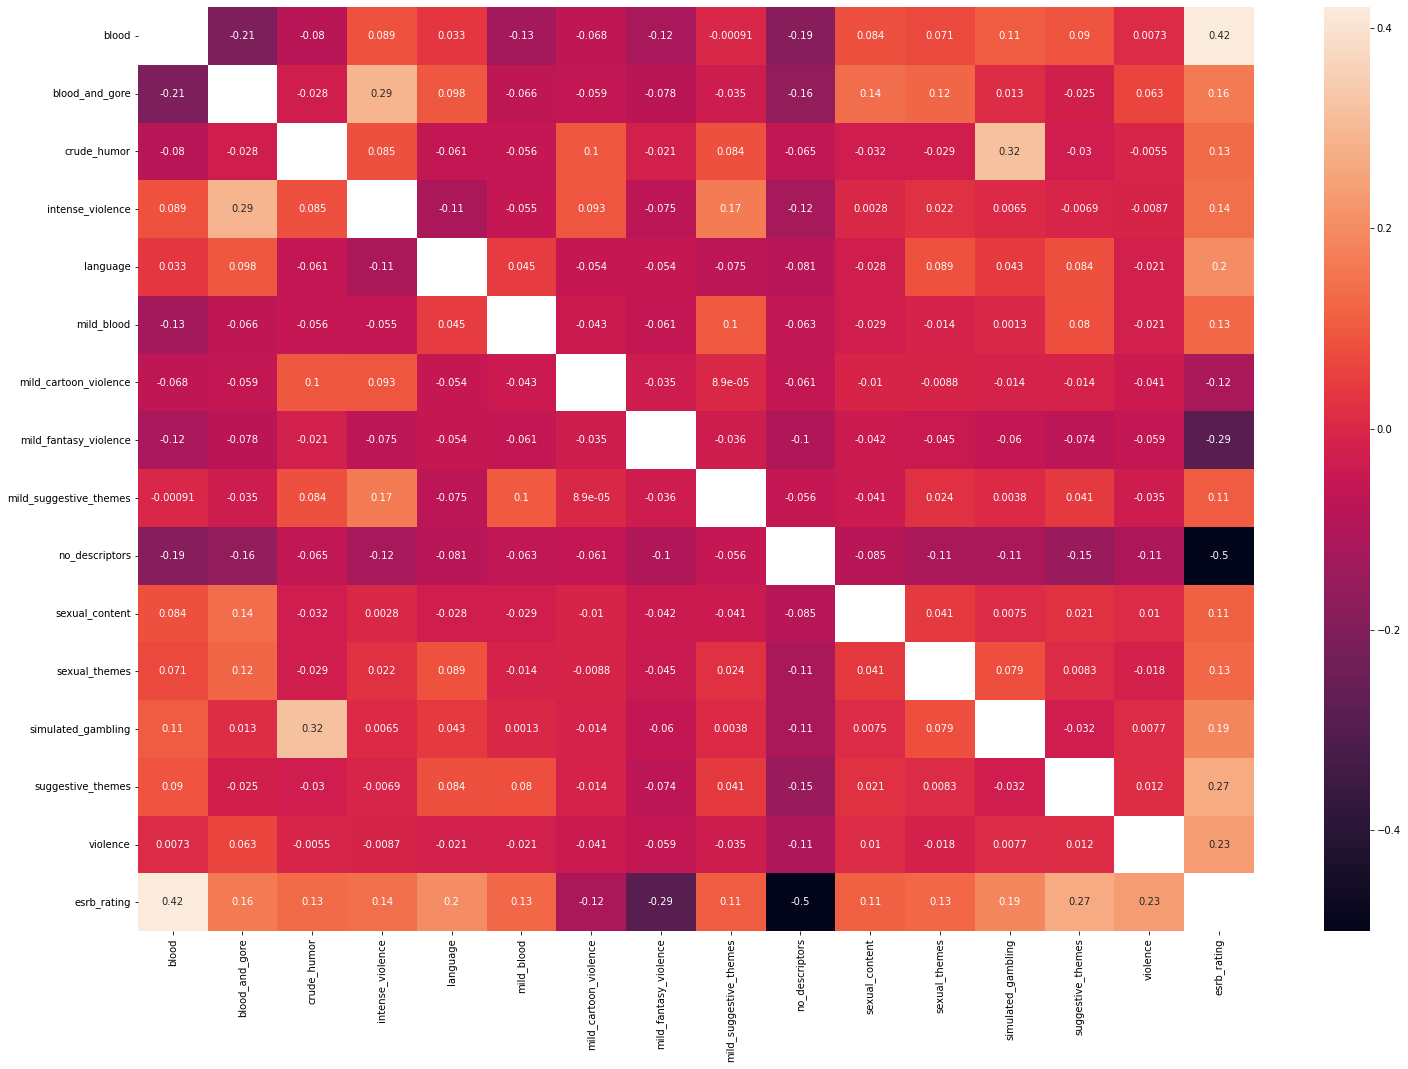

In [19]:
plt.figure(figsize = (25,17))
sns.heatmap(corr, annot=True)  #кращі значення

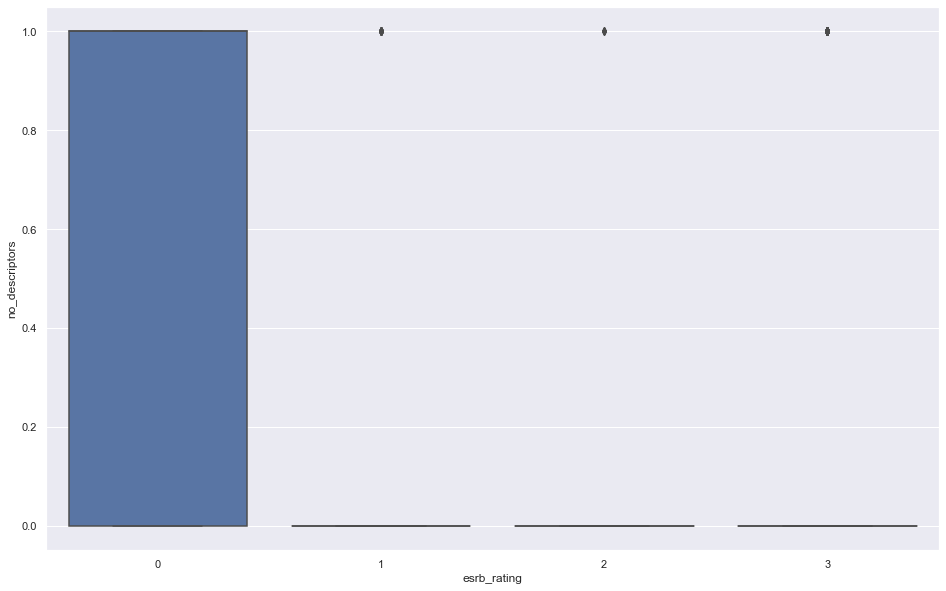

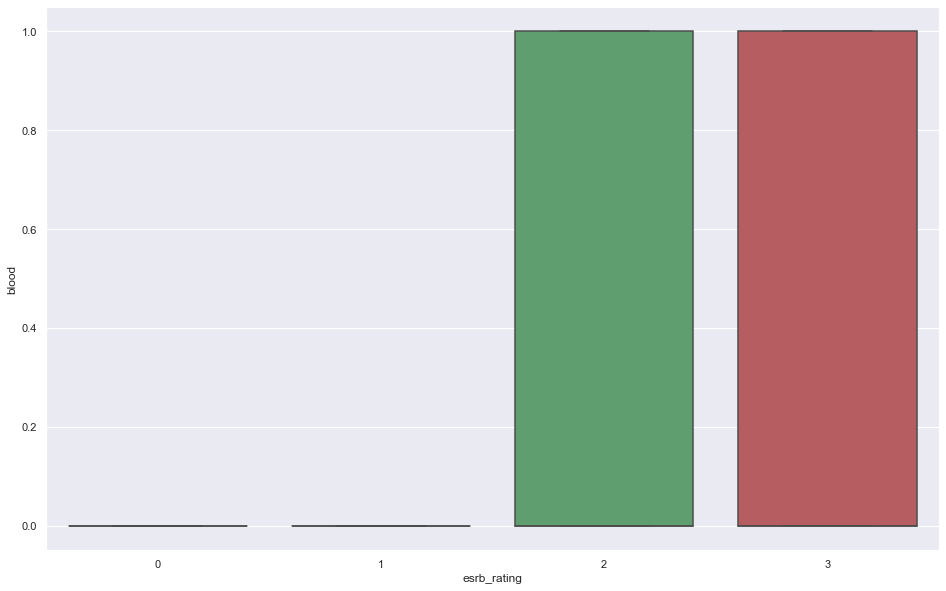

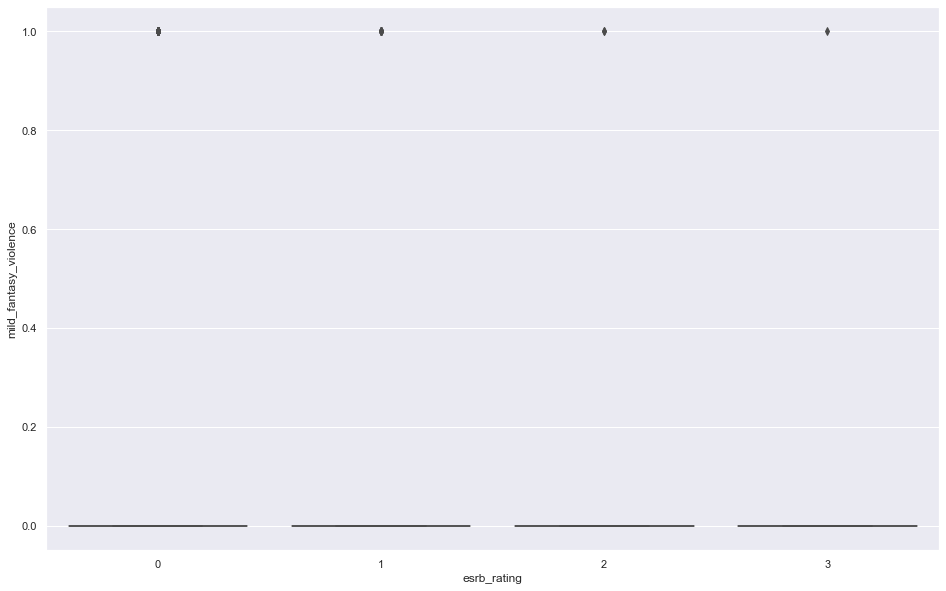

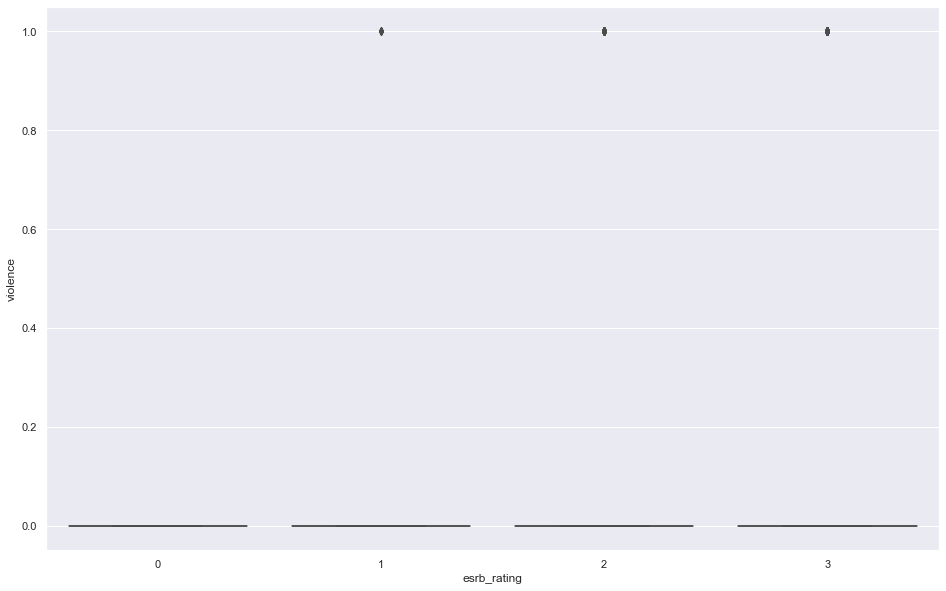

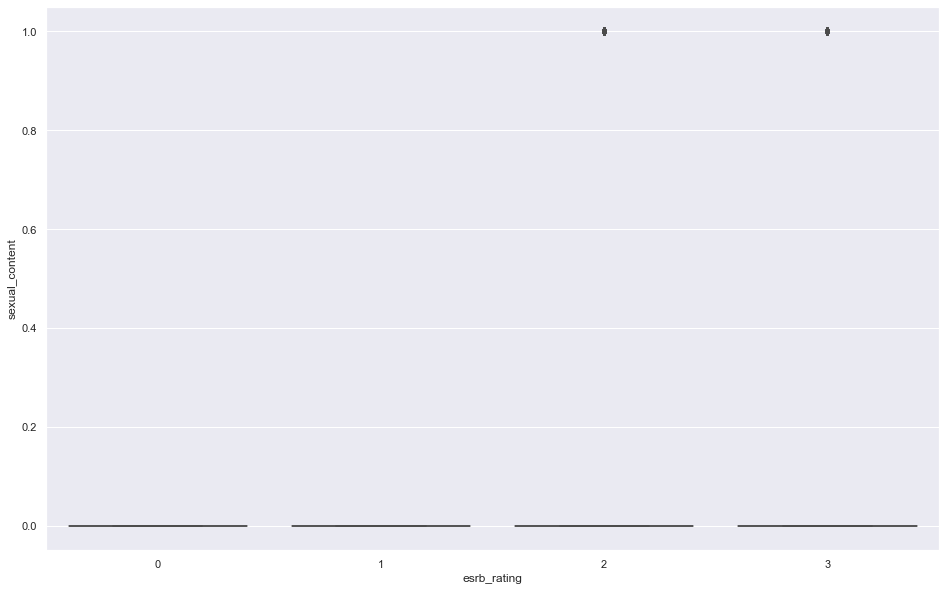

In [31]:
col = ["no_descriptors","blood", "mild_fantasy_violence", "violence", "sexual_content"]
sns.set(rc={'figure.figsize':(16,10)})
for item in col:
    sns.boxplot(x="esrb_rating", y=item, data=df)
    plt.show()

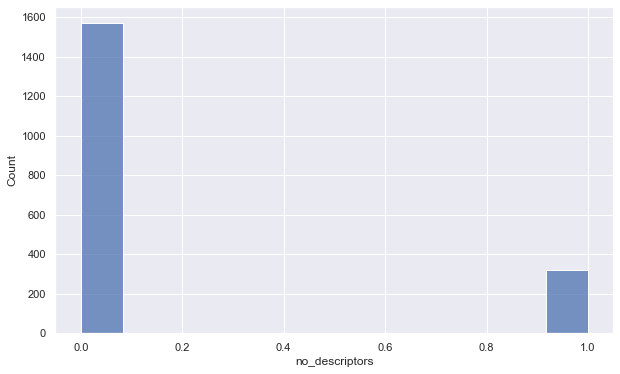

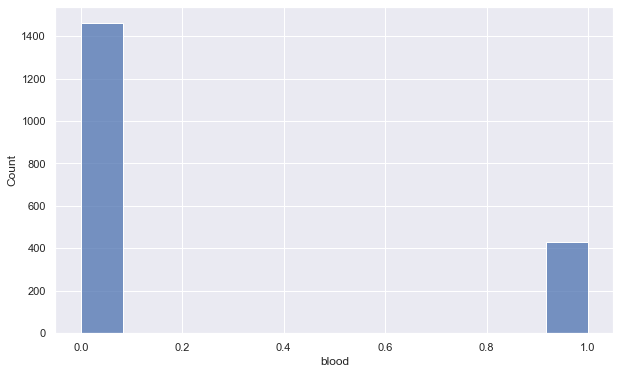

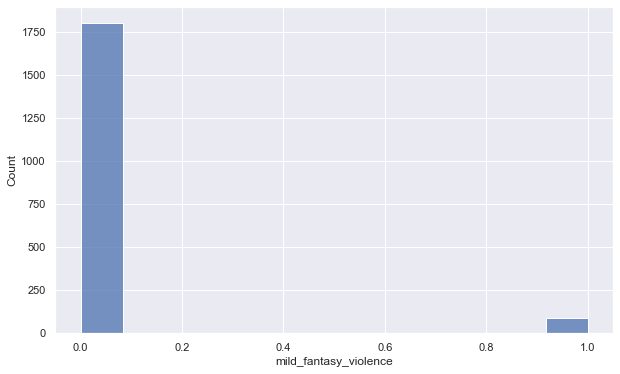

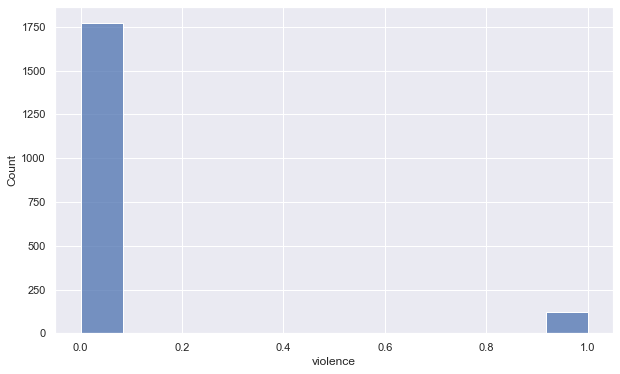

In [30]:
i = 1
for item in col:
    plt.figure(i, figsize=(10,6))
    sns.histplot(data = df[item], stat="percent")
    i = i+1

In [34]:
trgt = ["esrb_rating"]      
dfprep = df.columns.drop(trgt) #викидаємо рейтинг
train,test = train_test_split(df,test_size = 0.33,random_state= 12)  #розбиваємо датасет на тренувальну/тестову вибірку
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

In [35]:
param_grid ={'n_neighbors': [3,5,7,9,11]}   #к-сть сусідів, що перевір
knnModel = KNeighborsClassifier()    #кнн алгоритм
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())                       #процесс обучения, подгонка
results = pd.DataFrame(grid_search.cv_results_)  #запис результатів передбачення
print("The best score is", grid_search.best_score_) # оптимальні параметри
print("The best parameters are:\n", grid_search.best_estimator_) #best is 11


The best score is 0.7399396221717345
The best parameters are:
 KNeighborsClassifier(n_neighbors=11)


In [37]:
knnModel = KNeighborsClassifier(n_neighbors=11) #knn метод 
knnModel.fit(xTrain,yTrain.values.ravel())
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       127
           1       0.63      0.78      0.70       139
           2       0.76      0.63      0.69       129
           3       0.70      0.67      0.68       231

    accuracy                           0.72       626
   macro avg       0.74      0.73      0.73       626
weighted avg       0.73      0.72      0.72       626



<AxesSubplot:>

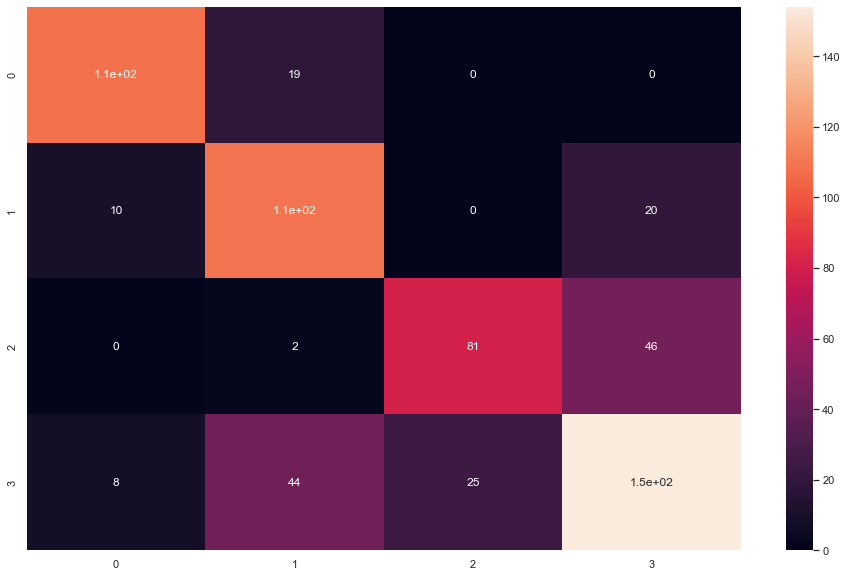

In [38]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [39]:
param_grid ={'max_depth': [4, 6, 8, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}   #пошук оптимальних значень
dTree = DecisionTreeClassifier()   #бо дерево жадібне
grid_search=GridSearchCV(dTree, param_grid, cv=5,    #оцінка параметрів, св - кол-во групп для проверки модели на выборке
                           scoring='r2',   #оценка регресии от 0.0 до 1.0
                           return_train_score=True) #оценки обучения вычисляются, дорого, но выше точность, по умолч с нью вер
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.5992674906711359
The best parameters are:
 DecisionTreeClassifier(max_depth=10, max_features=8)


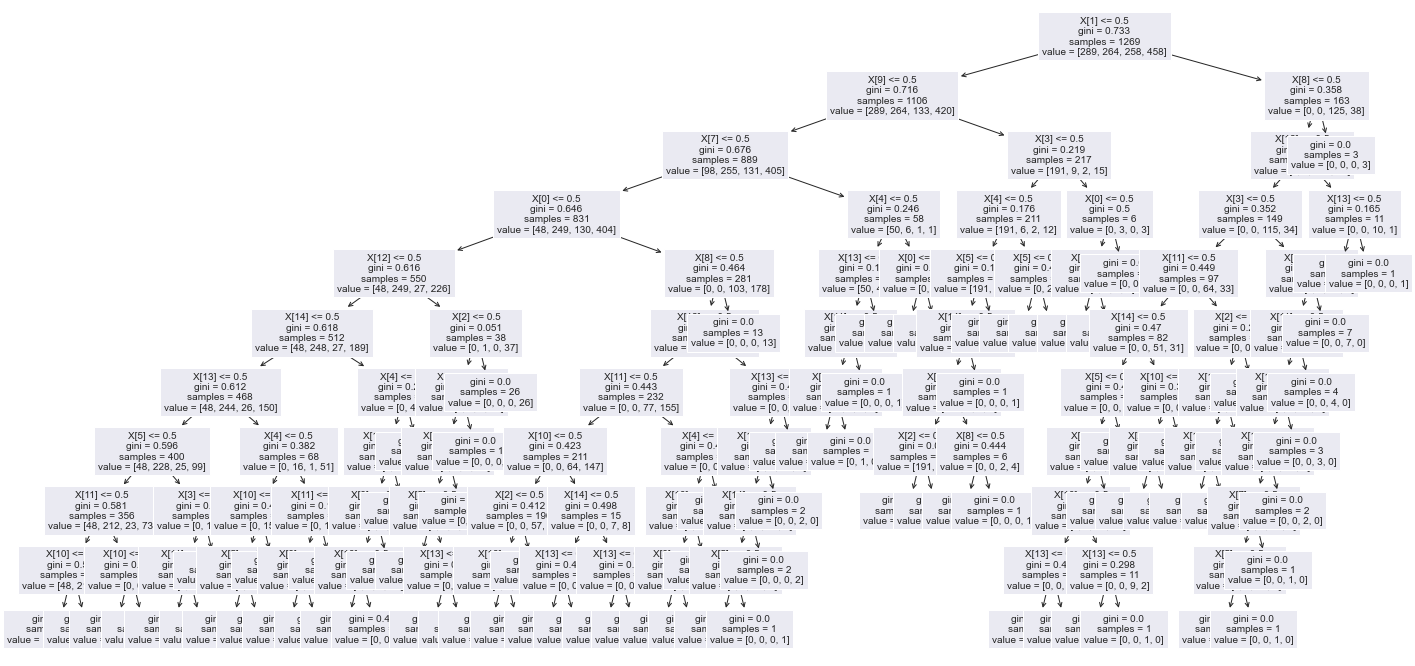

In [40]:
dTree = DecisionTreeClassifier(max_depth=10, max_features=8)   #бо дерево жадібне
dTree.fit(xTrain, yTrain)


plt.figure(figsize=(24,12))
plot_tree(dTree, fontsize=10)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       127
           1       0.59      0.73      0.65       139
           2       0.88      0.64      0.74       129
           3       0.69      0.75      0.72       231

    accuracy                           0.73       626
   macro avg       0.77      0.73      0.74       626
weighted avg       0.76      0.73      0.74       626



<AxesSubplot:>

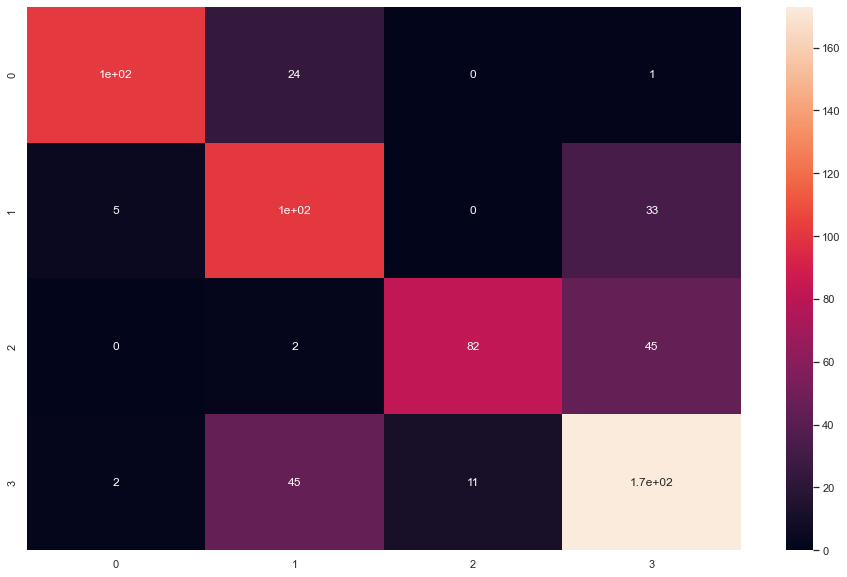

In [41]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [42]:
param_grid = {'C': [0.1, 1, 10, 25],'gamma': [0.1, 0.05, 0.03, 0.07, 0.01]} #1|c- избежать неправильной классификации
SVC_clsfr = SVC(kernel='rbf')   # гамма - область принятие решения, разброс
grid_search = GridSearchCV(SVC_clsfr, param_grid,      #радиально базисне ядро
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.7643833058417104
The best parameters are:
 SVC(C=10, gamma=0.1)


              precision    recall  f1-score   support

           0       0.92      0.85      0.89       127
           1       0.67      0.68      0.68       139
           2       0.85      0.64      0.73       129
           3       0.69      0.81      0.74       231

    accuracy                           0.75       626
   macro avg       0.78      0.74      0.76       626
weighted avg       0.76      0.75      0.75       626



<AxesSubplot:>

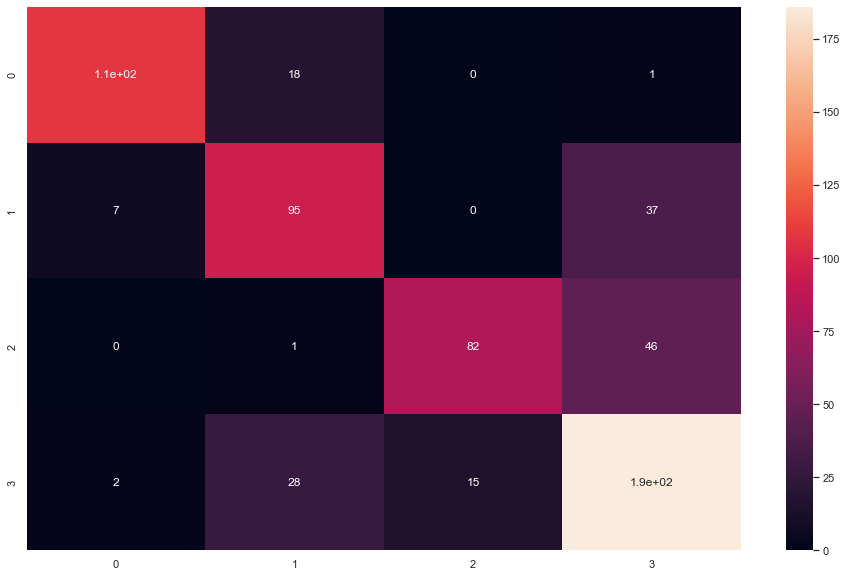

In [43]:
SVC_clsfr = SVC(kernel='rbf', C=10, gamma=0.1)  
SVC_clsfr.fit(xTrain,yTrain.values.ravel()) 
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [44]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]} #сколько деревьев и какова их глубна
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.6054773146242027
The best parameters are:
 RandomForestClassifier(max_depth=8)


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       127
           1       0.64      0.77      0.70       139
           2       0.89      0.62      0.73       129
           3       0.70      0.77      0.74       231

    accuracy                           0.76       626
   macro avg       0.79      0.75      0.76       626
weighted avg       0.77      0.76      0.76       626



<AxesSubplot:>

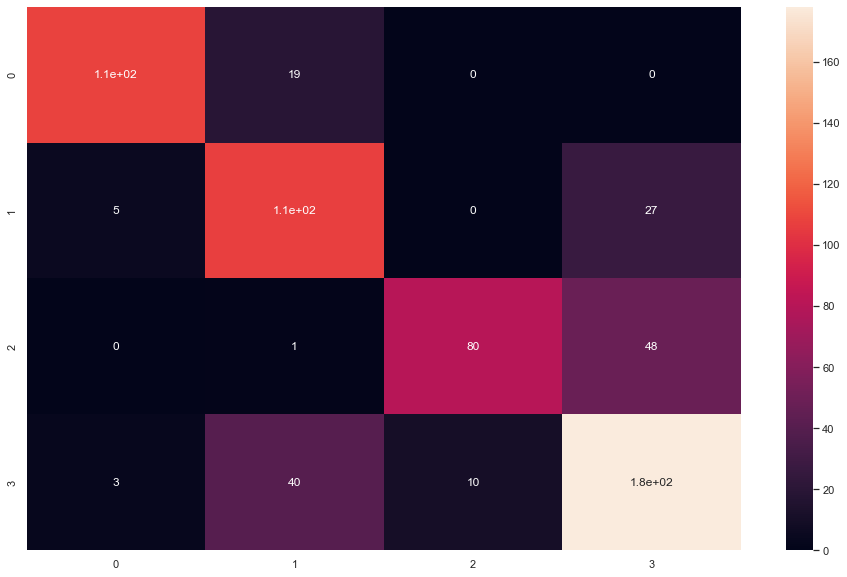

In [45]:
rForest = RandomForestClassifier(n_estimators = 200, max_depth = 8)
rForest.fit(xTrain,yTrain.values.ravel())

yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [46]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}   #больше вес, быстрее учится (но ту мач - дивиргент)
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.5811374665790312
The best parameters are:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       127
           1       0.66      0.77      0.71       139
           2       0.51      0.89      0.65       129
           3       0.74      0.40      0.52       231

    accuracy                           0.67       626
   macro avg       0.71      0.73      0.69       626
weighted avg       0.72      0.67      0.66       626



<AxesSubplot:>

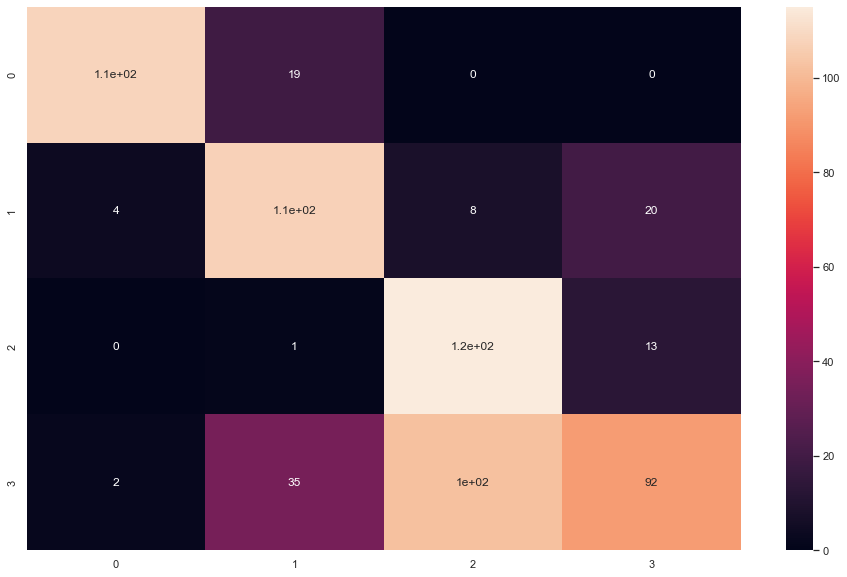

In [47]:
AdaB = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)   #количество учеников + вес на кажд итерации для ученика
AdaB.fit(xTrain,yTrain.values.ravel())

yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)